In [1]:
%pip install pandas matplotlib scikit-learn

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/22/a5/a0b255295406ed54269814bc93723cfd1a0da63fb9aaf99e1364f07923e5/pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7d/ca/e7bd1876a341ed8c456095962a582696cac1691cb6e55bd5ead15a755c5d/matplotlib-3.8.4-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/40/77/91f92b2fddbd14201bf36cd0c0e7279f1501a88e7a00ef11261c4b95bb7a/scikit_learn-1.4.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.26.0 from https://files.pythonhosted.org/packages/16/2e/86f24451c2d530c88daf997cb8d6ac622c1d40d19f5a031ed68a4b73a374/numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonh


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('data/parkinsons_updrs.data.csv')
df.head()

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5875 non-null   int64  
 1   subject#       5875 non-null   int64  
 2   age            5875 non-null   int64  
 3   sex            5875 non-null   int64  
 4   test_time      5875 non-null   float64
 5   motor_UPDRS    5875 non-null   float64
 6   total_UPDRS    5875 non-null   float64
 7   Jitter(%)      5875 non-null   float64
 8   Jitter(Abs)    5875 non-null   float64
 9   Jitter:RAP     5875 non-null   float64
 10  Jitter:PPQ5    5875 non-null   float64
 11  Jitter:DDP     5875 non-null   float64
 12  Shimmer        5875 non-null   float64
 13  Shimmer(dB)    5875 non-null   float64
 14  Shimmer:APQ3   5875 non-null   float64
 15  Shimmer:APQ5   5875 non-null   float64
 16  Shimmer:APQ11  5875 non-null   float64
 17  Shimmer:DDA    5875 non-null   float64
 18  NHR     

In [20]:
x = df.drop('total_UPDRS', axis=1)
y = df['total_UPDRS']

In [21]:
from sklearn.model_selection import train_test_split
# split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the selected models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}


In [23]:
import json
import os

names = {}
names['num'] = x.select_dtypes(include=['int64', 'float64']).columns.tolist()

if not os.path.isdir('files'):
    os.makedirs('files')

with open('files/column_data.json', 'w') as f:
    json.dump(names, f)


In [24]:
from sklearn.metrics import mean_squared_error

pipeline_models = {}
mse_scores = {}
#train models
for name, model in models.items():
    model.fit(x_train, y_train)
    pipeline_models[name] = model

    # Make predictions
    y_pred = model.predict(x_test)
    # cal error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[name] = mse

# Convert the results to a DataFrame for pllotting
df_models = pd.DataFrame(mse_scores.items(), columns=['model', 'mse'])
df_models.head()


,model,mse
0,Linear Regression,9.562482
1,Decision Tree,0.207795
2,Random Forest,0.095003


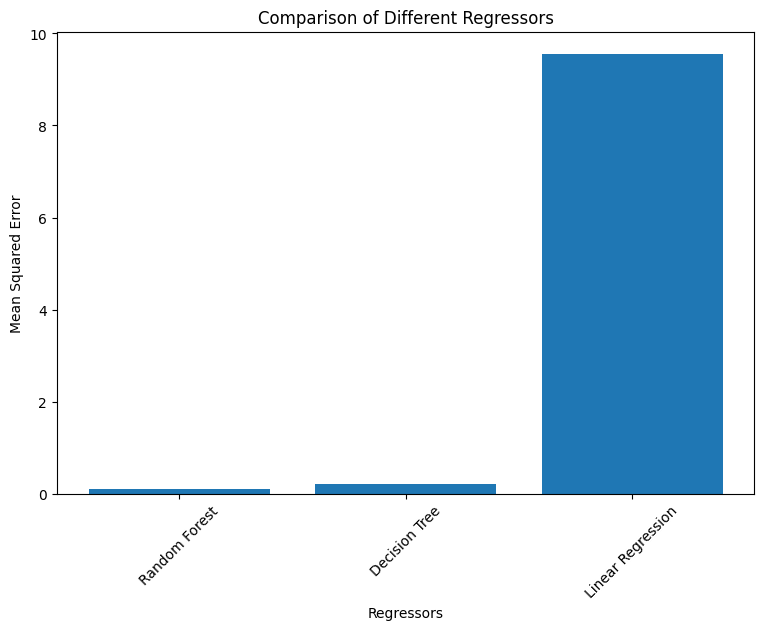

In [25]:
import matplotlib.pyplot as plt

# Plot the mean squared error for each model
plt.figure(figsize=(9, 6))

plt.bar('model', 'mse', data=df_models.sort_values('mse'))
plt.ylabel('Mean Squared Error')
plt.xlabel('Regressors')
plt.title('Comparison of Different Regressors')
plt.xticks(rotation=45)
plt.show()


the highest MSE the worst in predictions the values so Linear regression is the worst in our case

In [26]:
import pickle
# save the models in piplien_models.pkl file
with open('files/pipeline_models.pkl', 'wb') as f:
    pickle.dump(pipeline_models, f)


In [27]:
pipeline_models

{'Linear Regression': LinearRegression(),
 'Decision Tree': DecisionTreeRegressor(),
 'Random Forest': RandomForestRegressor()}